In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Template ## Template Data Science -- Hands On Machine Learning

### Parte 3 - Clustering

### Dados

In [3]:
def data_info(data):        
    info = pd.DataFrame()
    info['var'] = data.columns
    info['# missing'] = list(data.isnull().sum())
    info['% missing'] = info['# missing'] / data.shape[0]
    info['types'] = list(data.dtypes)
    info['unique values'] = list(len(data[var].unique()) for var in data.columns)
    
    return info

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['target']  = iris.target
data_info(data)

,var,# missing,% missing,types,unique values
0,sepal length (cm),0,0.0,float64,35
1,sepal width (cm),0,0.0,float64,23
2,petal length (cm),0,0.0,float64,43
3,petal width (cm),0,0.0,float64,22
4,target,0,0.0,int32,3


In [25]:
data.shape

(150, 5)

In [26]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
y = data.iloc[:, 4]
data.drop(['target'], axis = 1, inplace=True)
X = data.iloc[:, :]

### Preprocessing

#### Lidando com variáveis categóricas

Label Encoder: dá a cada elemento da variável categórica um número

    Uso: categóricas ordinais

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_le = X.copy()
for var in X.columns:
    if (X[var].dtype == object):
        X_le[var] = le.fit_transform(X[var])

One Hot Encoder

In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
X_le = X.copy()
X_ohe = X.copy()
for var in X.columns:
    if (X[var].dtype == object):
        ohe = OneHotEncoder(categorical_features = [0])
        X_le[var] = le.fit_transform(X[var])
        X_ohe = ohe.fit_transform(X_le).toarray()
X_ohe = pd.DataFrame(X_ohe)

#### Padronização e Normalização

Normalização StandardScaler: remove a média de cada atributo e divide os atributos não-constantes pelo desvio padrão. Ex de uso: se um atributo cuja variância é MUITO maior do que do que dos outros atributos, este atributo pode dominar a função objetivo e impossibilitar o estimador de aprender com as outras features

In [30]:
X_encoded = X

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_encoded)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_stds = pd.DataFrame(std_scaler.transform(X_encoded), columns = X_encoded.columns)

Normalização para intervalo: escalar os atributos para que seus valores fiquem dentro de um intervalo, dado o valor mínimo e o máximo

In [33]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_encoded)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
X_minmaxs = pd.DataFrame(minmaxscaler.transform(X_encoded), columns = X_encoded.columns)

Normalização Robust Scaler: Quando o dataset contém muitos outliers, usar média e variância não trará resultados bons. Usa uma estimativa mais robusta para encontrar o centro dos dados. Remove a mediana e escala os dados de acordo com os intervalos de quartis(intervalo interquartil (IQR): intervalo entre o primeiro quartil (25%) e o terceiro quartil (75%))

In [35]:
from sklearn.preprocessing import RobustScaler

robscaler = RobustScaler()
robscaler.fit(X_encoded)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [36]:
X_robusts = pd.DataFrame(robscaler.transform(X_encoded), columns = X_encoded.columns)

Normalização por sample (linha): cada registro/sample com pelo menos um componente não zero é reescalado independentemente dos outros samples

-l1-norm: divide cada elemento de cada sample pela soma dos módulos de cada elemento do tal sample

-l2-norm: divide cada elemento de cada sample pela raíz quadrada da soma dos quadrados de cada elemento de tal sample

In [37]:
from sklearn.preprocessing import Normalizer

nscaler = Normalizer(norm = 'l1')
nscaler.fit(X_encoded)

Normalizer(copy=True, norm='l1')

In [38]:
X_norm = pd.DataFrame(nscaler.transform(X_encoded), columns = X_encoded.columns)

`Nota`: Para vetores normalizados, a similaridade cosseno e a similaridade euclidiana são linearmente conectadas

A distância euclidiana em um espaço de dados categóricos não é muito representativa para tais tipos de dados. "O fato de cobras não possuirem nem rodas nem pernas não nos permite dizer nada sobre os valores relativos de rodas e pernas"

Para variáveis categóricas outras técnicas de k-... podem ser melhores, tais como k-modes. Para texto, pode ser interessante usar k-means com distância cosseno em bag of words, como o CountVectorizer, já que a relação numérica com o texto será de quantas vezes tal palavra/char aparece no texto.

In [137]:
X = X_stds

In [138]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [139]:
y_train = y.iloc[0:140]
y_test = y.iloc[140:150]
X_train = X.iloc[0:140, :]
X_test = X.iloc[140:150, :]

#### Aplicação PCA

In [140]:
from sklearn.decomposition import PCA

In [148]:
#normalização
X_train_norm = X_train

pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
principal_components = pca.fit_transform(X_train_norm)

X_train_pca = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2'])
X_train_pca_target = pd.concat([X_train_pca, y_train], axis = 1)

print("Percentual da variância explicada: %s" % pca.explained_variance_ratio_)
X_train_pca_target.head()

Percentual da variância explicada: [0.72434147 0.23634825]


,pc1,pc2,target
0,-2.158519,0.476120,0
1,-1.949588,-0.678277,0
2,-2.243739,-0.353755,0
3,-2.173510,-0.609221,0
4,-2.288983,0.639469,0


In [149]:
X_train_pca.head()

,pc1,pc2
0,-2.158519,0.476120
1,-1.949588,-0.678277
2,-2.243739,-0.353755
3,-2.173510,-0.609221
4,-2.288983,0.639469


In [150]:
def plot_PCA_groups (data, group):
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    #targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

    targets = [0 ,1 ,2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = data[group] == target
        ax.scatter(data.loc[indicesToKeep, 'pc1']
                   , data.loc[indicesToKeep, 'pc2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    return ax

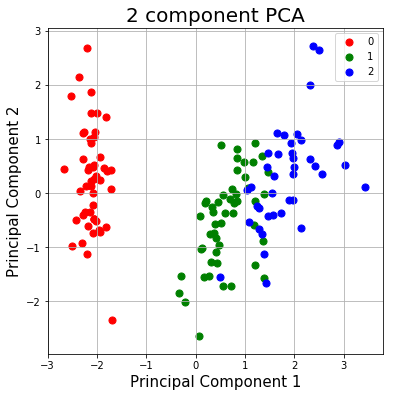

In [151]:
plot_PCA_groups(X_train_pca_target, 'target')

Supondo que clusterizei meus dados com tudo o que eu tinha (X_train) e estão chegando dados novos (X_test)

### K-means

#### K-means e previsões

Predições e tal

In [207]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, 
                random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

In [208]:
#X_test e X_train já estão normalizados
X_test_pca = pd.DataFrame(pca.transform(X_test), columns = ['pc1', 'pc2'])
X_train_pca = pd.DataFrame(pca.transform(X_train), columns = ['pc1', 'pc2'])

In [238]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [239]:
pred = kmeans.predict(X_test)

In [240]:
pred

array([0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [241]:
pred_total = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True), 
                        pd.DataFrame(pred, columns=['pred'])], axis = 1)
pred_total.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,1.038005,0.106445,1.047087,1.579429,2,0
1,1.280340,0.106445,0.762759,1.447956,2,0
2,-0.052506,-0.819166,0.762759,0.922064,2,2
3,1.159173,0.337848,1.217684,1.447956,2,0
4,1.038005,0.569251,1.103953,1.710902,2,0


E fixando centróides iniciais

In [231]:
dict_centroides = {'x1': [4, 1, 5.50, 6, 6, 6.25, 6.50, 6.75, 7, 5], 
                   'x2': [3, 3.25, 12, 13, 4, 4.25, 4.50, 4.75, 5, 4], 
                   'x3': [6, 10, 3.50, 3.75, 4, 4.25, 4.50, 4.75, 5, 1.50], 
                   'x4': [1, 1.25, 1.50, 1.75, 2, 2.25, 2.50, 2.75, 3, 0]}

centroides = pd.DataFrame(dict_centroides)
centroides

,x1,x2,x3,x4
0,4.00,3.00,6.00,1.00
1,1.00,3.25,10.00,1.25
2,5.50,12.00,3.50,1.50
3,6.00,13.00,3.75,1.75
4,6.00,4.00,4.00,2.00
5,6.25,4.25,4.25,2.25
6,6.50,4.50,4.50,2.50
7,6.75,4.75,4.75,2.75
8,7.00,5.00,5.00,3.00
9,5.00,4.00,1.50,0.00


In [232]:
centroides = np.array(centroides.iloc[0:3,:].reset_index(drop=True))

In [233]:
kmeans_init = KMeans(n_clusters=3, init=centroides, n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, 
                random_state=None, copy_x=True, n_jobs=1, algorithm='auto')


In [242]:
kmeans_init.fit(X_train)

C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 4.  ,  3.  ,  6.  ,  1.  ],
       [ 1.  ,  3.25, 10.  ,  1.25],
       [ 5.5 , 12.  ,  3.5 ,  1.5 ]]),
    max_iter=300, n_clusters=3, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [243]:
pred_init = kmeans_init.predict(X_test)

In [244]:
pred_init

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [245]:
pred_total_init = pd.concat([X_test.reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True), 
                        pd.DataFrame(pred, columns=['pred_init'])], axis = 1)
pred_total_init

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred_init
0,1.038005,0.106445,1.047087,1.579429,2,0
1,1.280340,0.106445,0.762759,1.447956,2,0
2,-0.052506,-0.819166,0.762759,0.922064,2,2
3,1.159173,0.337848,1.217684,1.447956,2,0
4,1.038005,0.569251,1.103953,1.710902,2,0
5,1.038005,-0.124958,0.819624,1.447956,2,0
6,0.553333,-1.281972,0.705893,0.922064,2,2
7,0.795669,-0.124958,0.819624,1.053537,2,0
8,0.432165,0.800654,0.933356,1.447956,2,0
9,0.068662,-0.124958,0.762759,0.790591,2,2


Plot Com e sem PCA

In [152]:
kmeans_sempca = KMeans(n_clusters=3)
kmeans_compca = KMeans(n_clusters=3)

kmeans_sempca.fit(X_train_norm)
kmeans_compca.fit(X_train_pca)

cluster_labels_sempca = kmeans_sempca.predict(X_train_norm)
cluster_labels_compca = kmeans_compca.predict(X_train_pca)

In [155]:
previsoes = pd.concat([X_train_pca_target, pd.DataFrame(cluster_labels_sempca), pd.DataFrame(cluster_labels_compca)], axis = 1)
previsoes.columns = ['pc1', 'pc2', 'target', 'prev_sempca', 'prev_compca']
previsoes

,pc1,pc2,target,prev_sempca,prev_compca
0,-2.158519,0.476120,0,1,0
1,-1.949588,-0.678277,0,1,0
2,-2.243739,-0.353755,0,1,0
3,-2.173510,-0.609221,0,1,0
4,-2.288983,0.639469,0,1,0
5,-1.992997,1.490348,0,1,0
6,-2.335942,0.031681,0,1,0
7,-2.121514,0.218477,0,1,0
8,-2.199170,-1.131040,0,1,0
9,-2.055646,-0.472839,0,1,0


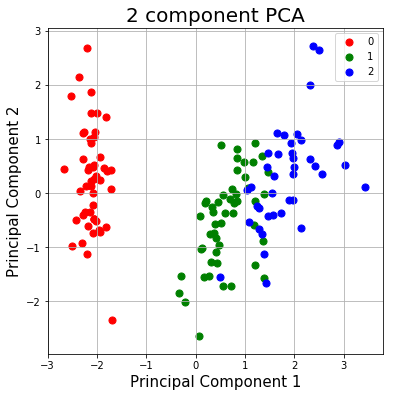

In [156]:
plot_PCA_groups(previsoes, 'target')

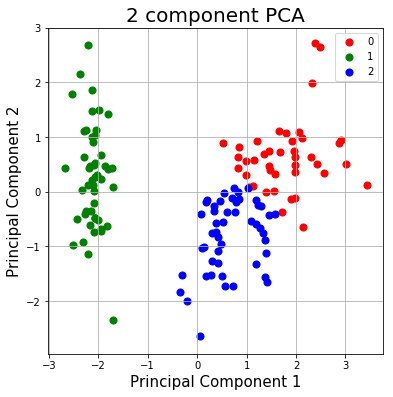

In [157]:
plot_PCA_groups(previsoes, 'prev_sempca')

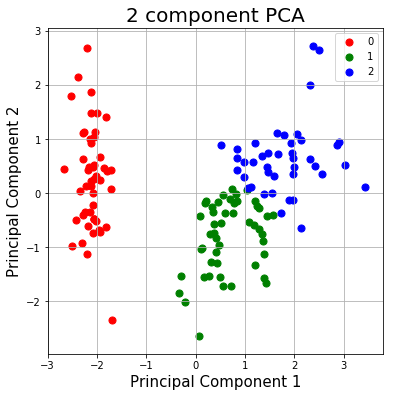

In [158]:
plot_PCA_groups(previsoes, 'prev_compca')

##### Mas qual o valor de k?

Elbow e Silhouette

In [65]:
from sklearn.cluster import KMeans

`Nota`: inertia ou wcss(within-cluster squared sum) é o que queremos minimizar, a distância intra-cluster:

$$wcss = \sum_{i = 0}^{n} (||x_j - μ_i||^2)$$

São assumidas algumas coisas:

-  clusters são convexos e isotrópicos. Respondem mal a clusters alongados ou com formas irregulares
-  não é normalizado. Sabemos que números baixos são bons e zero é o ótimo. Mas em alta dimensão pode sofrer da maldição da dimensionalidade e se tornar inflado, sem sabermos se o resultado é bom ou ruim. PCA pode aliviar tal problema.

In [68]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [127]:
def sil_elbow_scores(range_tuple = [2, 3], init_k = 'k-means++', X = None):
    k_values = range_tuple
    first=True
    for k in k_values:
        #print(type(init_k).__name__)
        if type(init_k).__name__ != 'str':
            init_k = np.array(centroides.iloc[0:k,:].reset_index(drop=True))
        #print(init_k)
        kmeans = KMeans(n_clusters=k, init = init_k, n_init=1) #init default = 'k-means++'
        cluster_labels = kmeans.fit_predict(X)
        score_wss = round(kmeans.inertia_ ,1)
        silhueta = round(silhouette_score(X, cluster_labels),4)
        #plt.plot(Nc,score)
        #plt.xlabel('Number of Clusters')
        #plt.ylabel('Within Cluster Sum of Squares')
        #plt.title('Elbow Curve')
        #plt.show()
        resultados_aux = {
            'score_wss': score_wss,
            'silhueta': silhueta
        }
        resultados_aux = pd.DataFrame(resultados_aux, index = [k])
        if first == True:
            resultados_final = resultados_aux
            first = False
        else:
            resultados_final = pd.concat([resultados_final, resultados_aux],axis =0)


    plt.plot(resultados_final.index,resultados_final.score_wss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.title('Elbow Curve')
    plt.show()

    plt.plot(resultados_final.index,resultados_final.silhueta)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette')
    plt.title('')
    plt.show()

    print(resultados_final)

##### Sem fixar centróides iniciais

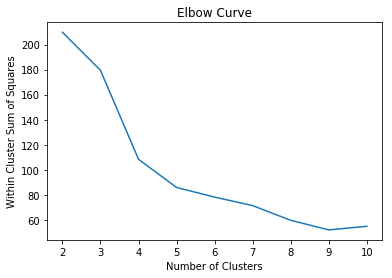

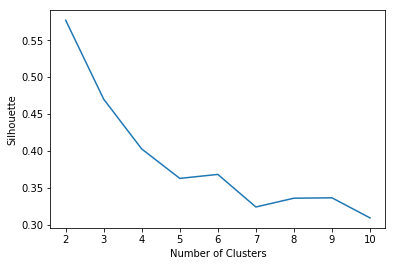

    score_wss  silhueta
2       209.8    0.5770
3       179.4    0.4701
4       108.4    0.4027
5        85.9    0.3629
6        78.2    0.3683
7        71.4    0.3242
8        59.7    0.3361
9        52.0    0.3366
10       54.9    0.3094


In [128]:
sil_elbow_scores(range(2, 11), X = X_train)

In [102]:
list(kmeans.cluster_centers_)

[array([-2.11328776, -0.33576871]),
 array([ 0.49543083, -0.32154173]),
 array([ 0.22048215, -1.51384419]),
 array([2.86496747, 0.55598022]),
 array([-2.12437653,  1.05186488]),
 array([1.22700626, 0.26014892]),
 array([ 1.42663717, -0.83969251]),
 array([1.85278538, 0.80428268]),
 array([-1.69415939, -2.34616884]),
 array([2.39681783, 2.45384605])]

##### fixando centróides iniciais

In [183]:
centroides

,x1,x2,x3,x4
0,4.00,3.00,6.00,1.00
1,1.00,3.25,10.00,1.25
2,5.50,12.00,3.50,1.50
3,6.00,13.00,3.75,1.75
4,6.00,4.00,4.00,2.00
5,6.25,4.25,4.25,2.25
6,6.50,4.50,4.50,2.50
7,6.75,4.75,4.75,2.75
8,7.00,5.00,5.00,3.00
9,5.00,4.00,1.50,0.00


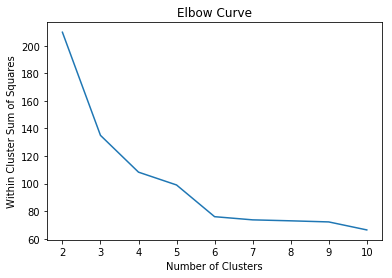

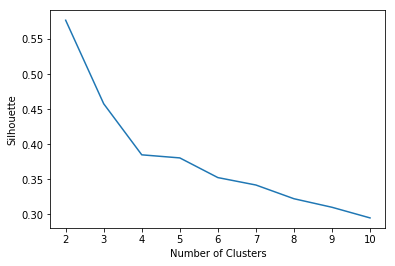

    score_wss  silhueta
2       209.8    0.5770
3       135.0    0.4577
4       108.3    0.3848
5        99.0    0.3804
6        76.0    0.3523
7        73.7    0.3417
8        73.0    0.3221
9        72.2    0.3099
10       66.4    0.2947


In [129]:
sil_elbow_scores(range(2, 11), init_k = centroides, X = X_train)

##### E usando PCA?

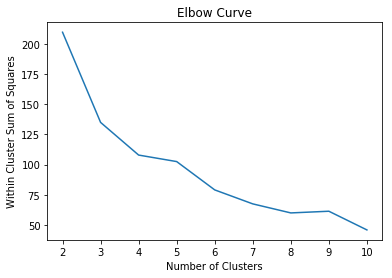

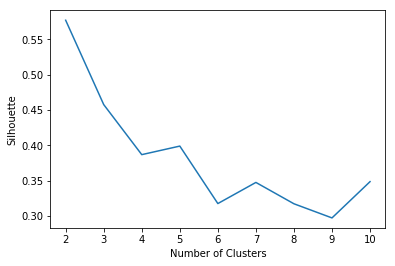

    score_wss  silhueta
2       209.8    0.5770
3       135.0    0.4577
4       107.9    0.3869
5       102.5    0.3990
6        79.0    0.3177
7        67.4    0.3476
8        59.9    0.3174
9        61.3    0.2974
10       45.8    0.3487


In [130]:
sil_elbow_scores(range(2, 11), X = X_train)

### Hierárquico/Agglomerative

In [247]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [220]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_
    #print(children)
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    #print distance
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [261]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', 
                                linkage='ward')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000002C74ADDDA60>)

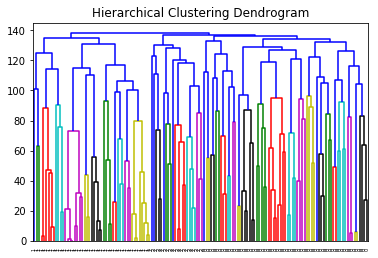

In [263]:
clusters_labels = model.fit_predict(X_train)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=clusters_labels)
plt.show()

In [267]:
labels = model.labels_

In [270]:
previsoes = pd.concat([X_train, pd.DataFrame(y_train, columns = ['target']), pd.DataFrame(labels, columns = ['pred'])], axis = 1)

In [271]:
previsoes

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,-0.900681,1.032057,-1.341272,-1.312977,0,1
1,-1.143017,-0.124958,-1.341272,-1.312977,0,1
2,-1.385353,0.337848,-1.398138,-1.312977,0,1
3,-1.506521,0.106445,-1.284407,-1.312977,0,1
4,-1.021849,1.263460,-1.341272,-1.312977,0,1
5,-0.537178,1.957669,-1.170675,-1.050031,0,1
6,-1.506521,0.800654,-1.341272,-1.181504,0,1
7,-1.021849,0.800654,-1.284407,-1.312977,0,1
8,-1.748856,-0.356361,-1.341272,-1.312977,0,1
9,-1.143017,0.106445,-1.284407,-1.444450,0,1


#### silhouette

não adequado para hierárquico já que supõe grupos globulares

In [275]:
silhueta = silhouette_score(X_train, labels)
print('Silhueta: %s' % silhueta)

Silhueta: 0.4526716138239339


#### DBScan

In [277]:
from sklearn.cluster import DBSCAN

In [281]:
dbscan = DBSCAN(eps=0.3, min_samples=4, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, 
                n_jobs=1)
cluster_labels = dbscan.fit_predict(X_train)

In [282]:
cluster_labels

array([ 0,  1,  1,  1,  0, -1,  0,  0, -1,  1, -1,  0,  1, -1, -1, -1, -1,
        0, -1,  2,  0,  2, -1,  0,  0,  1,  0,  0,  0,  1,  1, -1, -1, -1,
        1,  0, -1,  1, -1,  0,  0, -1,  1, -1,  2,  1,  2,  1, -1,  0, -1,
       -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  4, -1, -1,  3, -1, -1,  4,  4,  4,  3, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1], dtype=int64)

In [284]:
num_clusters = max(cluster_labels) - min(cluster_labels) + 1
num_clusters

6

In [287]:
previsoes = pd.concat([X_train, y_train, pd.DataFrame(clusters_labels, columns= ['clusters_dbscan'])], axis = 1)
previsoes

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters_dbscan
0,-0.900681,1.032057,-1.341272,-1.312977,0,1
1,-1.143017,-0.124958,-1.341272,-1.312977,0,1
2,-1.385353,0.337848,-1.398138,-1.312977,0,1
3,-1.506521,0.106445,-1.284407,-1.312977,0,1
4,-1.021849,1.263460,-1.341272,-1.312977,0,1
5,-0.537178,1.957669,-1.170675,-1.050031,0,1
6,-1.506521,0.800654,-1.341272,-1.181504,0,1
7,-1.021849,0.800654,-1.284407,-1.312977,0,1
8,-1.748856,-0.356361,-1.341272,-1.312977,0,1
9,-1.143017,0.106445,-1.284407,-1.444450,0,1


Com PCA

In [290]:
cluster_labels_pca = dbscan.fit_predict(X_train_pca)

In [291]:
num_clusters = max(cluster_labels_pca) - min(cluster_labels_pca) + 1
num_clusters

6

In [302]:
previsoes = pd.concat([X_train_pca_target, pd.DataFrame(cluster_labels_pca, columns= ['clusters_dbscan'])], axis = 1)
previsoes.columns = ['pc1', 'pc2', 'target', 'clusters_dbscan']
previsoes

,pc1,pc2,target,clusters_dbscan
0,-2.158519,0.476120,0,0
1,-1.949588,-0.678277,0,0
2,-2.243739,-0.353755,0,0
3,-2.173510,-0.609221,0,0
4,-2.288983,0.639469,0,0
5,-1.992997,1.490348,0,-1
6,-2.335942,0.031681,0,0
7,-2.121514,0.218477,0,0
8,-2.199170,-1.131040,0,0
9,-2.055646,-0.472839,0,0


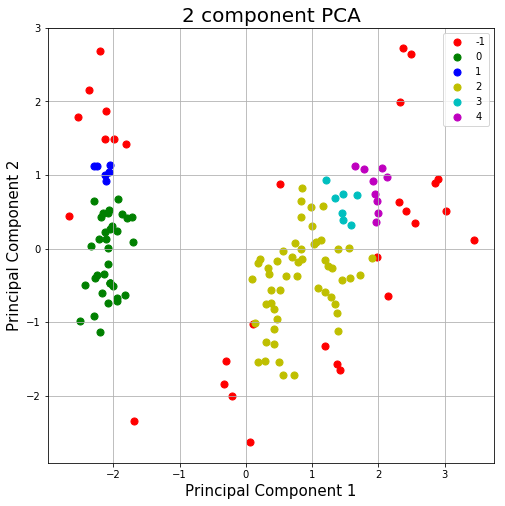

In [303]:
def plot_PCA_groups_dbscan (data, group):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    #targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

    targets = [-1, 0 ,1 ,2, 3, 4]
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for target, color in zip(targets,colors):
        indicesToKeep = data[group] == target
        ax.scatter(data.loc[indicesToKeep, 'pc1']
                   , data.loc[indicesToKeep, 'pc2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    return ax

plot_PCA_groups_dbscan(previsoes, 'clusters_dbscan')